In [1]:
import pandas as pd
import numpy as np
import re
import string
from tqdm import tqdm
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import spacy

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('train.csv',encoding='Latin-1',lineterminator='\n',on_bad_lines='skip')

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
164089,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
164090,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
164091,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
164092,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.shape

(164094, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164094 entries, 0 to 164093
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             164093 non-null  object
 1   comment_text   160602 non-null  object
 2   toxic          159691 non-null  object
 3   severe_toxic   159464 non-null  object
 4   obscene        159346 non-null  object
 5   threat         159263 non-null  object
 6   insult         159225 non-null  object
 7   identity_hate  158888 non-null  object
dtypes: object(8)
memory usage: 10.0+ MB


In [6]:
df.head(13)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
df.isnull().sum()

id                  1
comment_text     3492
toxic            4403
severe_toxic     4630
obscene          4748
threat           4831
insult           4869
identity_hate    5206
dtype: int64

In [9]:
df.isnull().sum()

id                  1
comment_text     3492
toxic            4403
severe_toxic     4630
obscene          4748
threat           4831
insult           4869
identity_hate    5206
dtype: int64

In [10]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
df['comment_text']=df['comment_text'].str.replace('http\S+',' ')
df['comment_text']=df['comment_text'].str.replace('\d+',' ')
df['comment_text']=df['comment_text'].str.replace('[^\w\s]',' ')
df['comment_text']=df['comment_text'].str.replace('\n',' ')
df.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,""" Congratulations from me as well, use the to...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [12]:
df = df[df['toxic'].str.contains('[A-Z]+') == False]
df = df[df['severe_toxic'].str.contains('[A-Z]+') == False]
df = df[df['obscene'].str.contains('[A-Z]+') == False]
df = df[df['threat'].str.contains('[A-Z]+') == False]
df = df[df['insult'].str.contains('[A-Z]+') == False]
df = df[df['identity_hate'].str.contains('[A-Z]+') == False]

In [13]:
df.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,""" Congratulations from me as well, use the to...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [14]:
df['toxic']=df['toxic'].astype(int)
df['severe_toxic']=df['severe_toxic'].astype(int)
df['obscene']=df['obscene'].astype(int)
df['threat']=df['threat'].astype(int)
df['insult']=df['insult'].astype(int)
df['identity_hate']=df['identity_hate'].astype(int)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
158862,ffea4adeee384e90,You should be ashamed of yourself That is a ...,0,0,0,0,0,0
158863,ffee36eab5c267c9,"Spitzer Umm, theres no actual article for pr...",0,0,0,0,0,0
158864,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [17]:
#convert into lower case
df['comment_text'] = df.comment_text.map(lambda x : x.lower())
df['comment_text'] 


0         explanation why the edits made under my userna...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         " more i can't make any real suggestions on im...
4         you, sir, are my hero. any chance you remember...
                                ...                        
158861    ":::::and for the second time of asking, when ...
158862    you should be ashamed of yourself   that is a ...
158863    spitzer   umm, theres no actual article for pr...
158864    and it looks like it was actually you who put ...
158865    " and ... i really don't think you understand....
Name: comment_text, Length: 158866, dtype: object

In [18]:
import re

In [19]:
#remove puncutaion and special character
import string # special operations on strings

def clean_text(text):
   
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove any remaining standalone newline characters
    text = text.replace('\n', ' ')
     # Remove mentions (e.g., @user1)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    
    # Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#', '', text)
    
    # Remove URLs (e.g., http://example.com)
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers and alphanumeric combinations
    text = re.sub(r'\b\d+\b|\w*\d\w*', '', text)
     
    # Remove special characters and punctuations
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Remove newline characters within words (e.g., \n\nklen\n\n)
    text = re.sub(r'\b\n+\b', ' ', text)
    
    
    return text


In [20]:
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text']

0         explanation why the edits made under my userna...
1         daww he matches this background colour im seem...
2         hey man im really not trying to edit war its j...
3          more i cant make any real suggestions on impr...
4         you sir are my hero any chance you remember wh...
                                ...                        
158861    and for the second time of asking when your vi...
158862    you should be ashamed of yourself   that is a ...
158863    spitzer   umm theres no actual article for pro...
158864    and it looks like it was actually you who put ...
158865     and  i really dont think you understand  i ca...
Name: comment_text, Length: 158866, dtype: object

In [21]:
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [22]:
df.isnull().values.any()

False

In [23]:
df.duplicated().values.any()

False

In [24]:
#numbers of coment in each catogery
for i in df.columns.values[2:]:
    print(df[i].value_counts())
    print("="*50)

toxic
0    143587
1     15279
Name: count, dtype: int64
severe_toxic
0    157271
1      1595
Name: count, dtype: int64
obscene
0    150425
1      8441
Name: count, dtype: int64
threat
0    158388
1       478
Name: count, dtype: int64
insult
0    150994
1      7872
Name: count, dtype: int64
identity_hate
0    157462
1      1404
Name: count, dtype: int64


In [25]:
#Clean Comments Count
RS = df.iloc[:,2:].sum(axis=1)
clean_comments_count = (RS==0).sum(axis=0)

print("Total number of comments = ",len(df))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(df)-clean_comments_count))

Total number of comments =  158866
Number of clean comments =  142662
Number of comments with labels = 16204


In [26]:
tag_sums = df.iloc[:,2:].sum(axis=1)
df['clean'] = (tag_sums==0)

In [27]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,True
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,True
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0,True
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0,True
158862,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,True
158863,ffee36eab5c267c9,spitzer umm theres no actual article for pro...,0,0,0,0,0,0,True
158864,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,True


In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['clean'] = LE.fit_transform(df['clean'])

In [29]:
columns = list(df.columns.values)
columns = columns[2:]
print(columns)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']


In [30]:
#Calculating Number of Comments in each Category 
counts = []
for columns in columns:
    counts.append((columns,df[columns].sum()))
df_stats = pd.DataFrame(counts, columns=['columns', 'number of comments'])
df_stats

,columns,number of comments
0,toxic,15279
1,severe_toxic,1595
2,obscene,8441
3,threat,478
4,insult,7872
5,identity_hate,1404
6,clean,142662


In [31]:
#comment print for toxic 
print("toxic:")
print(df[df.toxic==1].iloc[7,1])

toxic:
stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell


In [32]:
#comment print for severe_toxic
print("severe_toxic:")
print(df[df.severe_toxic==1].iloc[8,1])

severe_toxic:
you gay motherfucker i know where you livei am going to sand your face offthen i am to going to beat you to a pulpyou chicken shagger


In [33]:
#comment print for obscene 
print("obscene:")
print(df[df.obscene==1].iloc[1,1])

obscene:
you are gay or antisemmitian   archangel white tiger  meow greetingshhh  uh there are two ways why you do erased my comment about  that holocaust was brutally slaying of jews and not gaysgypsysslavsanyone    if you are antisemitian than shave your head bald and go to the skinhead meetings    if you doubt words of the bible that homosexuality is a deadly sin make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals    first and last warning you fucking gay  i wont appreciate if any more nazi shwain would write in my page i dont wish to talk to you anymore  beware of the dark side


In [34]:
##comment print for threat 
print("threat:")
print(df[df.threat==1].iloc[2,1])

threat:
im also a sock puppet of this accountsuprise sincerely             the man that will track you down from the internet and kill you


In [35]:
#comment print for insult 
print("insult:")
print(df[df.insult==1].iloc[17,1])

insult:
   fuck you     fuck you award go fuck yourself   


In [36]:
#comment print for identity_hate 
print("identity_hate:")
print(df[df.identity_hate==1].iloc[19,1])

identity_hate:
once again im so glad that wikipedia is not biased or filled with retarded children


In [37]:
print('Number of sentences having one word are',len(df[df['comment_text']==1]))

Number of sentences having one word are 0


In [38]:
# non toxic comments
non_toxic_comments = df[df['toxic'] ==0]['comment_text']
non_toxic_comments.reset_index(inplace=True,drop=True)
for i in range(5):
    print(non_toxic_comments[i])

explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired 
daww he matches this background colour im seemingly stuck with thanks  talk  january   utc
hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info
 more i cant make any real suggestions on improvement  i wondered if the section statistics should be later on or a subsection of types of accidents  i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first  if you have any preferences for formatting style on references or want to do it yourself please let me know  there appears to be a bac

In [39]:
sum_row=df.iloc[:,2:].sum(axis=1)

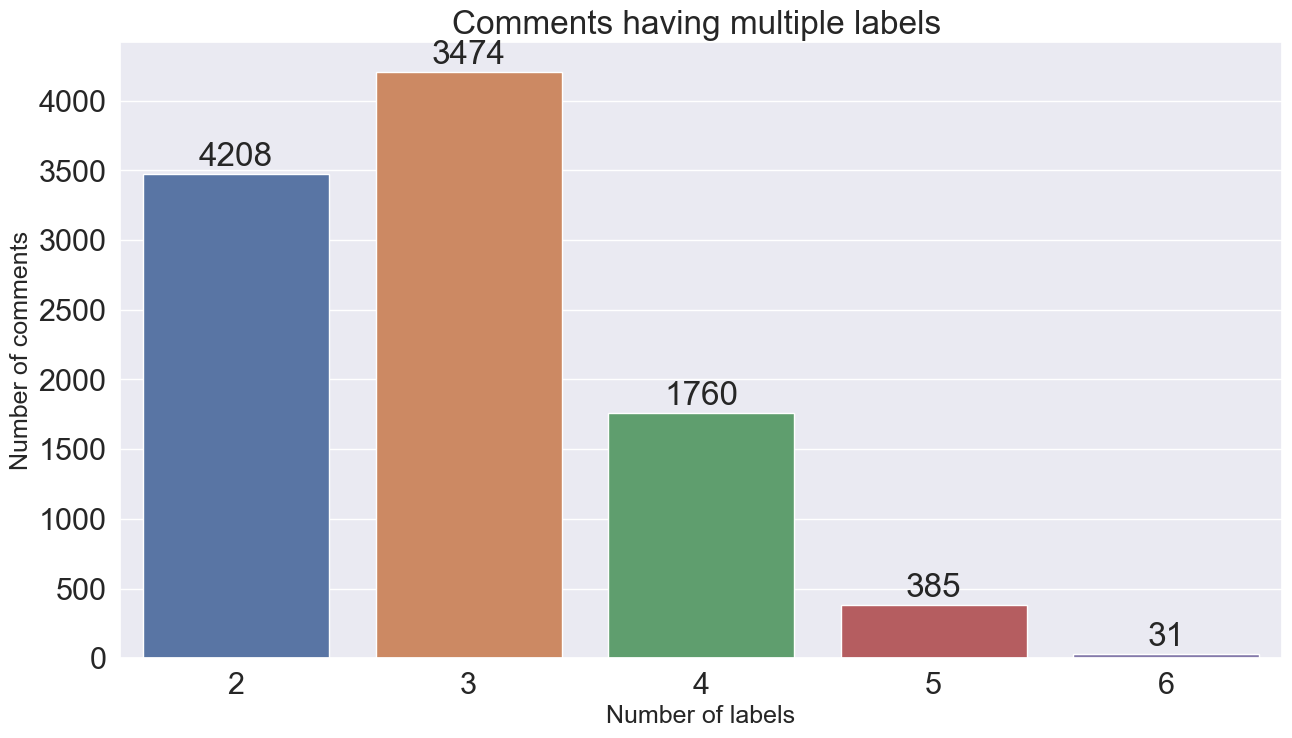

In [40]:
#Comments having multiple labels
RS = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = RS.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [41]:
Cols=df.iloc[:,2:]

<Axes: >

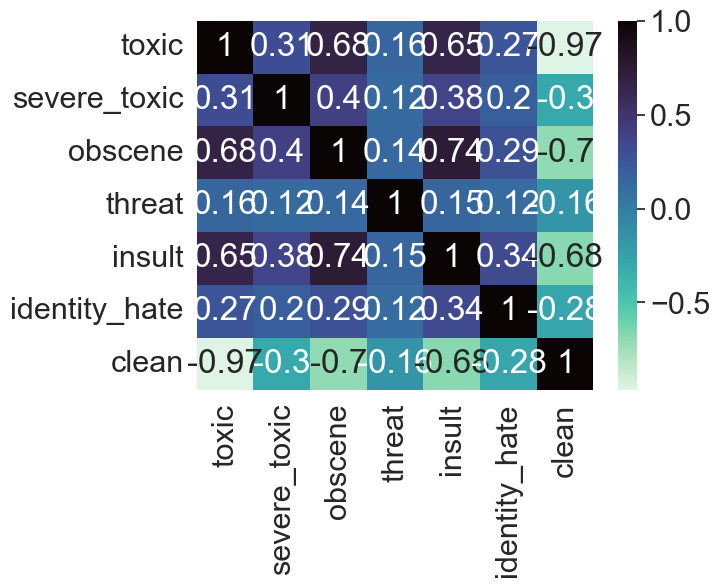

In [42]:
sns.heatmap(Cols.corr(),annot=True,cmap="mako_r")

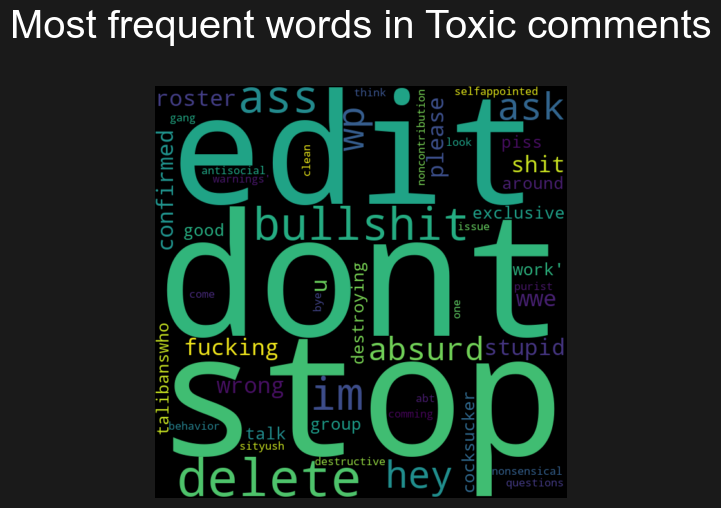

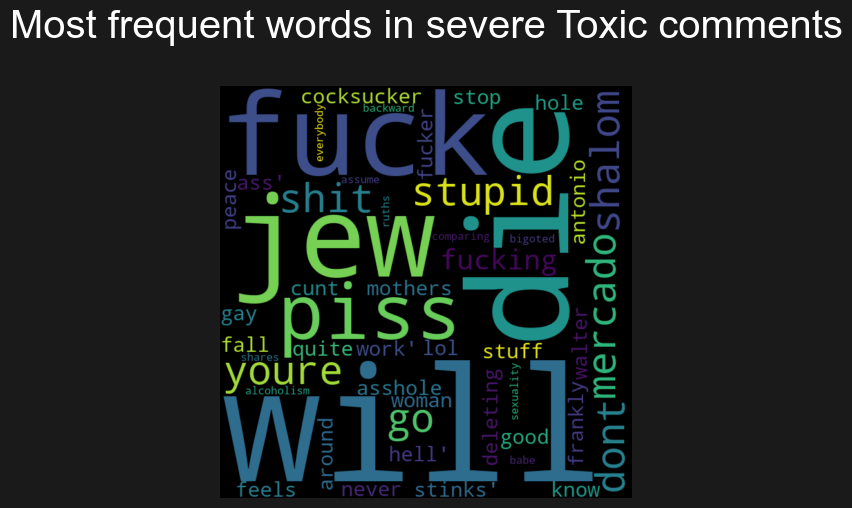

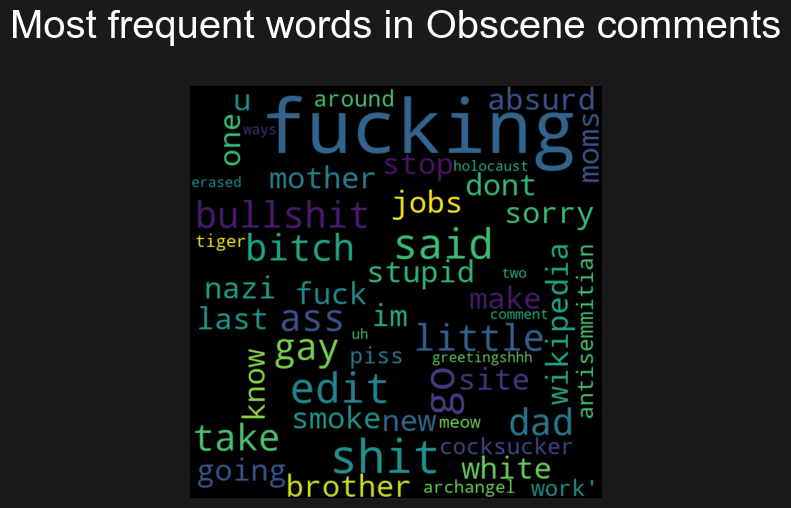

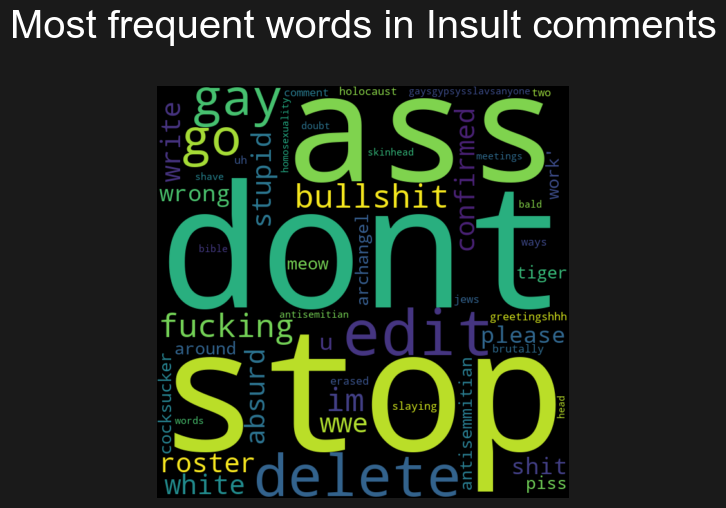

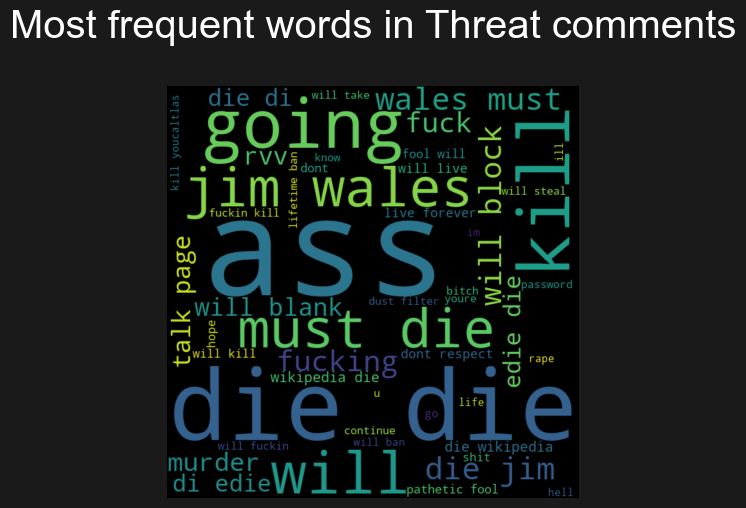

In [43]:
#world cloud without stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

def word_plot(column,text):
    
    comments =df['comment_text'].loc[column == 1].values     # sort by toxicity
    
    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black', max_words=50
                ).generate(str(comments))   
    
    fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle("Most frequent words in " +  text , y = 1.06,color = "white")
    plt.tight_layout(pad = 0)
    plt.axis('off')
    plt.show()
    
word_plot(df['toxic'], "Toxic comments")
word_plot(df['severe_toxic'],"severe Toxic comments")
word_plot(df['obscene'],"Obscene comments")
word_plot(df['insult'],"Insult comments")
word_plot(df['threat'],"Threat comments")

In [44]:
#stopwords
from nltk.corpus import stopwords

print(stopwords.words('english'))
len(stopwords.words('english'))

stop_words = set(stopwords.words('english'))
stop_words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
df['clean_coments'] = df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,clean_coments
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,1,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,1,daww matches background colour im seemingly st...
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,1,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0,1,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,1,sir hero chance remember page thats
...,...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0,1,second time asking view completely contradicts...
158862,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,1,ashamed horrible thing put talk page
158863,ffee36eab5c267c9,spitzer umm theres no actual article for pro...,0,0,0,0,0,0,1,spitzer umm theres actual article prostitution...
158864,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,1,looks like actually put speedy first version d...


In [46]:
df['clean_coments'].shape

(158866,)

In [47]:
# Create a copy of the DataFrame
df1 = df.copy()

# Replace the 'comment_text' column with the 'Clf' column in the copied DataFrame
df1['comment_text'] = df1['clean_coments']

# Optionally, you can drop the 'Clf' column in the copied DataFrame if it's no longer needed
df1.drop(columns=['clean_coments'], inplace=True)

In [48]:
df1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0,1
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,1
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,1
158862,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,1
158863,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,1
158864,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0,1


In [49]:
# joining the words in to single document
text = ' '.join(df['comment_text'].iloc[0:10])
text

'explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired  daww he matches this background colour im seemingly stuck with thanks  talk  january   utc hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info  more i cant make any real suggestions on improvement  i wondered if the section statistics should be later on or a subsection of types of accidents  i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first  if you have any preferences for formatting style on references or want to do it yourself please let me know  there appears to be a ba

In [50]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(text)
len(text_tokens)
print(text_tokens[0:500])


['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', 'they', 'werent', 'vandalisms', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', 'and', 'please', 'dont', 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'im', 'retired', 'daww', 'he', 'matches', 'this', 'background', 'colour', 'im', 'seemingly', 'stuck', 'with', 'thanks', 'talk', 'january', 'utc', 'hey', 'man', 'im', 'really', 'not', 'trying', 'to', 'edit', 'war', 'its', 'just', 'that', 'this', 'guy', 'is', 'constantly', 'removing', 'relevant', 'information', 'and', 'talking', 'to', 'me', 'through', 'edits', 'instead', 'of', 'my', 'talk', 'page', 'he', 'seems', 'to', 'care', 'more', 'about', 'the', 'formatting', 'than', 'the', 'actual', 'info', 'more', 'i', 'cant', 'make', 'any', 'real', 'suggestions', 'on', 'improvement', 'i', 'wondered', 'if', 'the', 'section', 'statistics', 'should', 'be

In [51]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
Lemm = WordNetLemmatizer()
df1['lem_text']=0

for x in df1['comment_text'].index:
    df1['lem_text'].iloc[x] = Lemm.lemmatize(df1['comment_text'].iloc[x])


df1['lem_text']


C:\Users\Shashank\AppData\Local\Temp\ipykernel_1564\923502924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lem_text'].iloc[x] = Lemm.lemmatize(df1['comment_text'].iloc[x])


0         explanation edits made username hardcore metal...
1         daww matches background colour im seemingly st...
2         hey man im really trying edit war guy constant...
3         cant make real suggestions improvement wondere...
4                       sir hero chance remember page thats
                                ...                        
158861    second time asking view completely contradicts...
158862                 ashamed horrible thing put talk page
158863    spitzer umm theres actual article prostitution...
158864    looks like actually put speedy first version d...
158865    really dont think understand came idea bad rig...
Name: lem_text, Length: 158866, dtype: object

In [52]:
df1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,lem_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,1,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0,1,daww matches background colour im seemingly st...
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,1,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,1,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,1,sir hero chance remember page thats
...,...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,1,second time asking view completely contradicts...
158862,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,1,ashamed horrible thing put talk page
158863,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,1,spitzer umm theres actual article prostitution...
158864,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0,1,looks like actually put speedy first version d...


In [53]:
selected_rows = df1.sample(5)
for index, row in selected_rows.iterrows():
    original_text = row['comment_text']
    lemmatized_text = row['lem_text']
    
    print("Original Text:")
    print(original_text)
    print("\n lem_text Text:")
    print(lemmatized_text)
    print("\n---------------------------------------------\n")

Original Text:
dont stalk god damnt

 lem_text Text:
dont stalk god damnt

---------------------------------------------

Original Text:
change image change image reads promotional shoot goodies picture like super old hairs even color anymore mid mid june

 lem_text Text:
change image change image reads promotional shoot goodies picture like super old hairs even color anymore mid mid june

---------------------------------------------

Original Text:
saying least historians terrorists construed attacking another religion saying someone historian attacking religion know historian abusive connotations please correct knowledge english wrong historian abuse really need understand seen example extremiststyle one way traffic equating osama personal attack please admin arbcom admin restraint expected cool sir civil wind warned windups know better please walk talk bent trying show faults would section linked also find response current accusation said number times subhash banned blnguyen number

In [54]:
df1['Len'] = df1['comment_text'].apply(lambda x : len(x))
df1['SLen'] = df1['lem_text'].apply(lambda x : len(x))

In [55]:
average_word_length = df1['Len'].mean()
print("Average Word Length:", average_word_length)
average_Sword_length = df1['SLen'].mean()
print("Average Word Length:", average_word_length)

Average Word Length: 243.09248045522642
Average Word Length: 243.09248045522642


In [56]:
from nltk.util import ngrams
from collections import Counter
toxic_text = ' '.join(df.loc[df.toxic == 1, 'comment_text'].values)
toxic_text_trigrams = [i for i in ngrams(toxic_text.split(), 3)]
Counter(toxic_text_trigrams).most_common(30)

[(('nigger', 'nigger', 'nigger'), 2006),
 (('you', 'are', 'a'), 1726),
 (('hi', 'moron', 'hi'), 1468),
 (('moron', 'hi', 'moron'), 1466),
 (('fuck', 'you', 'fuck'), 1272),
 (('you', 'fuck', 'you'), 1272),
 (('pig', 'pig', 'pig'), 1248),
 (('fat', 'jew', 'fat'), 1226),
 (('jew', 'fat', 'jew'), 1224),
 (('shit', 'shit', 'shit'), 1106),
 (('go', 'fuck', 'yourself'), 1025),
 (('bark', 'bark', 'bark'), 998),
 (('wanker', 'wanker', 'wanker'), 960),
 (('i', 'am', 'a'), 838),
 (('balls', 'balls', 'balls'), 831),
 (('bullshit', 'bullshit', 'bullshit'), 828),
 (('fuck', 'yourself', 'go'), 822),
 (('yourself', 'go', 'fuck'), 822),
 (('nipple', 'nipple', 'nipple'), 761),
 (('faggot', 'faggot', 'faggot'), 749),
 (('you', 'suck', 'you'), 741),
 (('suck', 'you', 'suck'), 736),
 (('ass', 'i', 'ass'), 677),
 (('i', 'ass', 'i'), 676),
 (('die', 'fag', 'die'), 624),
 (('fag', 'die', 'fag'), 624),
 (('faggots', 'faggots', 'faggots'), 623),
 (('your', 'a', 'dickhead'), 622),
 (('fucksex', 'fucksex', 'fucks

In [57]:
# non-toxic
non_toxic_text = ' '.join(df.loc[df.toxic == 0, 'comment_text'].values)
non_toxic_text_trigrams = [i for i in ngrams(non_toxic_text.split(), 3)]
Counter(non_toxic_text_trigrams).most_common(30)

[(('thank', 'you', 'for'), 3809),
 (('if', 'you', 'have'), 3446),
 (('please', 'do', 'not'), 3225),
 (('my', 'talk', 'page'), 3153),
 (('in', 'the', 'article'), 3032),
 (('there', 'is', 'no'), 2911),
 (('would', 'like', 'to'), 2857),
 (('of', 'the', 'article'), 2774),
 (('one', 'of', 'the'), 2746),
 (('is', 'not', 'a'), 2625),
 (('to', 'the', 'article'), 2479),
 (('the', 'talk', 'page'), 2445),
 (('you', 'want', 'to'), 2327),
 (('on', 'my', 'talk'), 2289),
 (('there', 'is', 'a'), 2249),
 (('blocked', 'from', 'editing'), 2244),
 (('feel', 'free', 'to'), 2241),
 (('it', 'is', 'not'), 2219),
 (('i', 'am', 'not'), 2186),
 (('you', 'will', 'be'), 2183),
 (('i', 'hope', 'you'), 2161),
 (('the', 'fact', 'that'), 2141),
 (('a', 'lot', 'of'), 2123),
 (('if', 'you', 'continue'), 2060),
 (('be', 'blocked', 'from'), 2052),
 (('for', 'speedy', 'deletion'), 2042),
 (('you', 'have', 'any'), 2011),
 (('will', 'be', 'blocked'), 1989),
 (('this', 'is', 'a'), 1960),
 (('you', 'continue', 'to'), 1925)]

In [58]:
df1

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,lem_text,Len,SLen
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,1,explanation edits made username hardcore metal...,173,173
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0,1,daww matches background colour im seemingly st...,73,73
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,1,hey man im really trying edit war guy constant...,144,144
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,1,cant make real suggestions improvement wondere...,377,377
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,1,sir hero chance remember page thats,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...
158861,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0,1,second time asking view completely contradicts...,186,186
158862,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,1,ashamed horrible thing put talk page,36,36
158863,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0,1,spitzer umm theres actual article prostitution...,66,66
158864,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0,1,looks like actually put speedy first version d...,57,57


In [59]:
#ngrams  range(1,1)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
#pip install scikit-learn

In [62]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,1),max_features = 1000)
bow_matrix_ngram1 =vectorizer_ngram_range.fit_transform(df1['comment_text'])
bow_matrix_ngram1


print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram1.toarray())

['able' 'absolutely' 'abuse' 'accept' 'acceptable' 'accepted' 'access'
 'according' 'account' 'accounts' 'accurate' 'across' 'act' 'action'
 'actions' 'actual' 'actually' 'add' 'added' 'adding' 'addition' 'address'
 'admin' 'administrator' 'administrators' 'admins' 'advice' 'afd' 'age'
 'ago' 'agree' 'ahead' 'aids' 'album' 'allow' 'allowed' 'almost' 'alone'
 'along' 'already' 'also' 'although' 'always' 'america' 'american' 'among'
 'anonymous' 'another' 'answer' 'anyone' 'anything' 'anyway' 'apparently'
 'appear' 'appears' 'appreciate' 'appropriate' 'april' 'area' 'arent'
 'argument' 'arguments' 'around' 'article' 'articles' 'ask' 'asked'
 'asking' 'ass' 'asshole' 'assume' 'attack' 'attacks' 'attempt'
 'attention' 'august' 'author' 'automatically' 'available' 'avoid' 'aware'
 'away' 'back' 'bad' 'balls' 'ban' 'band' 'banned' 'bark' 'barnstar'
 'based' 'basic' 'basically' 'basis' 'become' 'behavior' 'behind'
 'believe' 'best' 'better' 'bias' 'biased' 'big' 'bit' 'bitch' 'black'
 'block'

In [63]:
##ngrams  range(2,2)
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(2,2),max_features = 100)
bow_matrix_ngram2=vectorizer_ngram_range.fit_transform(df1['comment_text'])
bow_matrix_ngram2
print(vectorizer_ngram_range.get_feature_names_out())
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram2.toarray())


['add information' 'article would' 'articles talk' 'ask question'
 'ass ass' 'balls balls' 'bark bark' 'block block' 'blocked editing'
 'bullshit bullshit' 'criteria speedy' 'deleted wikipedia'
 'deletion article' 'deletion tag' 'discussion page' 'dont care'
 'dont know' 'dont like' 'dont see' 'dont think' 'dont want' 'edit page'
 'edit summary' 'edit war' 'edit warring' 'editing wikipedia'
 'enjoy editing' 'even though' 'external links' 'fair use' 'fat jew'
 'feel free' 'fish fish' 'five pillars' 'four tildes' 'fuck fuck'
 'fuck go' 'go fuck' 'good faith' 'hate hate' 'hello welcome' 'hi moron'
 'hope enjoy' 'id like' 'im going' 'im sorry' 'im sure'
 'information article' 'ip address' 'jew fat' 'leave note' 'let know'
 'lol lol' 'looks like' 'manual style' 'may contest' 'may deleted'
 'moron hi' 'need help' 'new york' 'nigger nigger' 'original research'
 'page would' 'pages using' 'personal attack' 'personal attacks' 'pig pig'
 'pillars wikipedia' 'please add' 'please dont' 'please rem

In [64]:
#ngrams  range(3,3)
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(3,3),max_features = 100)
bow_matrix_ngram3 =vectorizer_ngram_range.fit_transform(df1['comment_text'])
bow_matrix_ngram3
print(vectorizer_ngram_range.get_feature_names_out())
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram3.toarray())

['add information article' 'article manual style' 'articles talk page'
 'ask talk page' 'ass ass ass' 'balls balls balls' 'bark bark bark'
 'best best best' 'block block block' 'blocked editing wikipedia'
 'bullshit bullshit bullshit' 'continue blocked editing'
 'contributions hope like' 'criteria speedy deletion' 'date need help'
 'deleted wikipedia done' 'deletion tag dont' 'dickhead dickhead dickhead'
 'die fag die' 'dont hesitate add' 'editing wikipedian please'
 'enjoy editing wikipedian' 'fag die fag' 'faggot faggot faggot'
 'faggots faggots faggots' 'fair use rationale' 'fat jew fat'
 'feel free leave' 'fish fish fish' 'five pillars wikipedia'
 'four tildes automatically' 'freezer freezer freezer' 'fuck fuck fuck'
 'fuck go fuck' 'fuck yourselfgo fuck' 'fucksex fucksex fucksex'
 'go fuck go' 'hate hate hate' 'hello welcome wikipedia'
 'hesitate add information' 'hi moron hi' 'hope enjoy editing'
 'hope like place' 'information article would' 'jew fat jew'
 'learn contributing en

In [65]:
names_1 = vectorizer_ngram_range.get_feature_names_out()

In [66]:
from sklearn.metrics import classification_report

In [67]:
#split the variables
X= df1['comment_text']
Y= df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]

In [68]:
comments = df1['comment_text']
labels = df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]

In [69]:
#data partition
from sklearn.model_selection import train_test_split
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

In [70]:
#base model using navie base
from sklearn.pipeline import Pipeline
mnb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [71]:
#using hypermeters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Uni-gram or Bi-gram
    'clf__alpha': [0.1, 1.0, 10.0]  # Smoothing parameter
}

In [ ]:
#grid search in hyperparameters
from sklearn.model_selection import GridSearchCV
mnb_grid_search = GridSearchCV(mnb_pipeline, parameters, cv=5, n_jobs=-1)
for label in labels.columns:
    mnb_grid_search.fit(train_comments, train_labels[label])
    best_mnb_model = mnb_grid_search.best_estimator_
    val_predictions = best_mnb_model.predict(val_comments)
    print(f"Label: {label}")
    print(classification_report(val_labels[label], val_predictions))

In [ ]:
#Prediction using different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X= df1['comment_text']
Y= df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#using Tfdif
#vectorizer = TfidfVectorizer(max_features=5000)
#vectorizer = TfidfVectorizer(max_df=0.5,analyzer='word',ngram_range=(1,1),max_features=5000) # unigrams
#vectorizer = TfidfVectorizer(max_df=0.5,analyzer='word',ngram_range=(1,2),max_features=5000)#bigrams
vectorizer = TfidfVectorizer(max_df=0.5,analyzer='word',ngram_range=(1,3),max_features=5000)#trigrams

X = vectorizer.fit_transform(df1['comment_text'])
y = df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train len: ', X_train.shape[0])
print('X_valid len:  ',  X_valid.shape[0])

In [ ]:
#logistic regression
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = LogisticRegression()
    model.fit(X_train,y)
    y_pred = model.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))
    print(classification_report(y_valid[col], y_pred))

In [ ]:
#XGBoost
from collections import defaultdict
accuracy_data = defaultdict(list)
for col in df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model =XGBClassifier()
    model.fit(X_train,y)
    y_pred = model.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))
    print(classification_report(y_valid[col], y_pred))

In [ ]:
#knn classifier
accuracy_data = defaultdict(list)
for col in df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train,y)
    y_pred = model.predict(X_valid)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_valid[col], y_pred),5))
    print(classification_report(y_valid[col], y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
#split the variables
X= df1['comment_text']
Y= df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)

In [ ]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train_dtm

In [ ]:
X_train_dtm.shape

In [ ]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test_dtm = vect.transform(X_test)
# examine the document-term matrix from X_test
X_test_dtm

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier 
from collections import defaultdict


accuracy_data = defaultdict(list)
for col in df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train_dtm,y)
    y_pred =dt_clf.predict(X_test_dtm)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_test[col], y_pred),5))
    print(classification_report(y_test[col], y_pred))



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict


accuracy_data = defaultdict(list)
for col in df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','clean']]:
    print(' ')
    print('----prediction of {} column----'.format(col))
    print(' ')
    y = y_train[col]
    
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train_dtm,y)
    y_pred = classifier.predict(X_test_dtm)
    print('Testing accuracy is {}'.format(round(accuracy_score(y_valid[col], y_pred),5)))
    accuracy_data[col].append(round(accuracy_score(y_test[col], y_pred),5))
    print(classification_report(y_test[col], y_pred))



In [ ]:
import pickle
with open('classification.pkl', 'rb') as model_file, open('vectorizer.pkl', 'rb') as vectorizer_file:
    model = pickle.load(model_file)
    vectorizer = pickle.load(vectorizer_file)